In [254]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits,  make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [255]:
digits = load_digits()

In [256]:
X = digits['data']
y = digits['target']

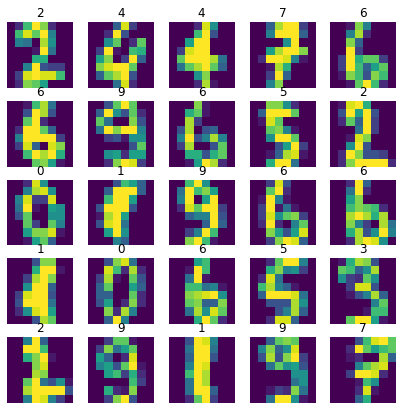

In [272]:
fig, axs = plt.subplots(5, 5, figsize=(7, 7))
for i in range(5):
    for j in range(5):
        k = np.random.randint(0, 1797)
        axs[i, j].imshow(X[k,:].reshape(8, 8))#, cmap='gray')
        axs[i, j].set_title(y[k])
        axs[i, j].axis('off')

In [258]:
class my_PCA():
    def __init__(self,X):
        self.X_centered = X - X.mean(axis = 0)
    def fit(self):
        X_covariance = np.matmul(self.X_centered.T,self.X_centered)
        eig_values, F = np.linalg.eigh(X_covariance)
        indices_sort = np.argsort(-1*eig_values)
        rearanged_F = F[:,indices_sort]
        sorted_eig_values = -1*np.sort(-1*eig_values, axis =0)
        return rearanged_F, sorted_eig_values
    def transform(self,Z,n):
        self.Z = Z
        Z_new_axis = np.matmul(self.X_centered, self.Z[:,:n])
        return Z_new_axis
    def fit_transform(X):
        pass

In [259]:
pca = my_PCA(X)

In [318]:
Z, eig_v = pca.fit()
XY = pca.transform(Z,2)
y1 = np.cumsum(eig_v)/np.sum(eig_v)
x1 = eig_v
x1[:15]

array([321496.44645596, 294037.07339949, 254652.03660974, 181576.27386431,
       124845.64540141, 106158.91069579,  93184.6322376 ,  79051.1315777 ,
        72398.54754584,  66473.18993037,  51220.19796078,  49068.82097211,
        39335.07269202,  38298.54435371,  31675.5531108 ])

Text(0, 0.5, 'cumsumсобственных значений')

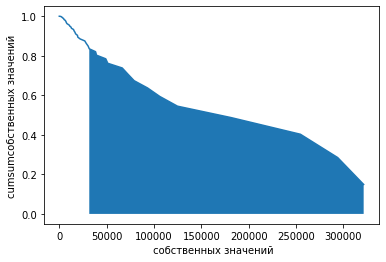

In [329]:
plt.plot(x1, y1 )
plt.fill_between(x1[:15],y1[:15])
plt.xlabel(" собственных значений")
plt.ylabel("cumsumсобственных значений" )

In [327]:
 #дисперсии данных покрывают первые 15 главных компонент?  ~ 0.8

Text(0, 0.5, 'cumsumсобственных значений')

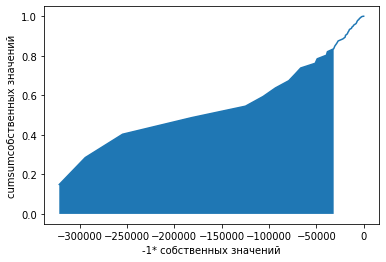

In [331]:
plt.plot(-1*x1, y1 )
plt.fill_between(-1*x1[:15],y1[:15])
plt.xlabel("-1* собственных значений")
plt.ylabel("cumsumсобственных значений" )

Text(0, 0.5, 'PCA2')

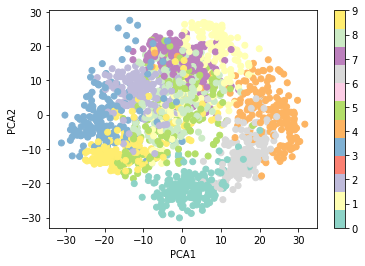

In [332]:
plt.scatter(XY[:,0],XY[:,1],c=y, cmap='Set3')
plt.colorbar()
plt.xlabel("PCA1")
plt.ylabel("PCA2")

In [333]:
XY = pca.transform(Z,12)

In [264]:
class my_kNN(): 
    def __init__(self, n_neighbors=5): 
        self.n_neighbors =  n_neighbors
    def fit_predict(self,X, y): 
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
        knn = KNeighborsClassifier(n_neighbors= self.n_neighbors)
        knn.fit(X_train, y_train)
        return knn.score(X_test, y_test)

In [265]:
def find_best_n_neighbors(n):
    t = np.zeros(n)
    for i in range(n):
        kNN = my_kNN(i+1)
        t[i] = (kNN.fit_predict(XY,y))
    plt.plot([i+1 for i in range(n)],t)
    plt.xlabel('n_neighbors')
    plt.ylabel('точность')
def find_best_n_components(n):
    t = np.zeros(n)
    for i in range(n):
        XY2 = pca.transform(Z,i+1)
        kNN = my_kNN(10)
        t[i] = (kNN.fit_predict(XY2,y))
    plt.plot([i+1 for i in range(n)],t)
    plt.xlabel('n_components')
    plt.ylabel('точность')

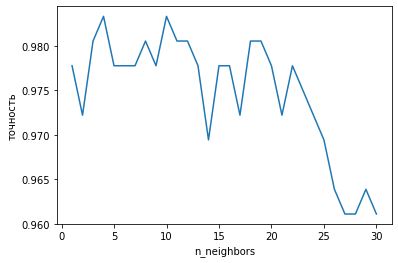

In [266]:
find_best_n_neighbors(30)

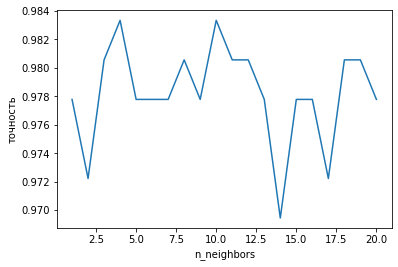

In [267]:
find_best_n_neighbors(20)

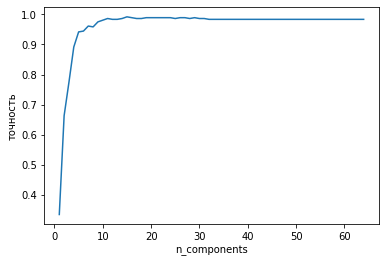

In [268]:
 find_best_n_components(64)

In [269]:
XY3 = pca.transform(Z,15)
kNN = my_kNN(10)
kNN.fit_predict(XY3,y)

0.9916666666666667

In [270]:
#алгоритм даёт наибольшую точность
# когда n_components ~15, n_neighbors ~ 10